# Identifying Sentiments (Part 1)
The data analyzed here were obtained from Analytics Vidhya. 

The metrics for evaluating the performance is the F1-score.

As at the time of writing this report (04/08/2019), 215 teams/individuals have registered for this learning competition. 
The score on the board according to their positions are shown below:
    1.    0.9164
    25.   0.8988
    50.   0.8937
    75.   0.8879
    100.  0.8834
The best submission based on the analysis in this report was 0.8966 (which was on #33, which is also in top 15th percentile).

This report will show some of the different techniques that were used and the corresponding F1-scores based on the test data set that was provided.

This report is divided into different sections and each section has an associated jupyter notebook which contains the codes used for the analysis.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
% matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics
from textblob import TextBlob
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel

import random
random.seed (1)

train = pd.read_csv('Train_Data.csv')
test = pd.read_csv('Test_Data.csv')

C:\Users\9020\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\9020\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# The dimension of the train and test data
print (train.shape)
print (test.shape)

(7920, 3)
(1953, 2)


In [3]:
# To make display clearer, the maximum display has been increased beyond the default
pd.set_option('display.max_colwidth', 1000)

In [4]:
# checking out the top two lines for the train data set
train.head(2)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/


In [5]:
# checking out the top two lines for the test data sets
test.head(2)

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks
1,7922,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://instagr.am/p/UUIS0bIBZo/


In [5]:
X = train.tweet
y = train.label

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)

The ideal way to do data analysis is to try out various Machine Learning algorithms and optimize the parameters by using grid search with cross-validation. This would give the best parameter which can then be used for deployment on new data. In addition, the data being analyzed is part of a learning competiton, so one can make a submission to see how good the test case performs against new data set.

In this analysis, the grid search is first conducted to see what the analysis suggest to be the best set of parameter and how it eventually perform with the test data set.

In [6]:
# Checking what the CountVectorizer parameters look like
# This is initial tokenization
vect = CountVectorizer()
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [7]:
# checking what the Multinomial naive bayes parameters look like
nb = MultinomialNB()
nb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [8]:
# Setting up a simple Pipeline 
text_clf = Pipeline([('vect', CountVectorizer()),
                      ('nb', MultinomialNB())])

In [12]:
parameters = {
    'vect__stop_words': [None, 'english'],
    'vect__lowercase': [True, False], 
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'vect__min_df':[1, 2], 
    'vect__max_df':[0.3, 0.5, 1.0],
    'nb__alpha': [1, 0.1, 0.01]
}

In [13]:
grid_search = GridSearchCV(text_clf, parameters, cv = 3, scoring = 'f1', verbose = 5)
grid_search.fit(X, y)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] nb__alpha=1, vect__lowercase=True, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  nb__alpha=1, vect__lowercase=True, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.8137384412153237, total=   0.1s
[CV] nb__alpha=1, vect__lowercase=True, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  nb__alpha=1, vect__lowercase=True, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.8222669349429913, total=   0.1s
[CV] nb__alpha=1, vect__lowercase=True, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  nb__alpha=1, vect__lowercase=True, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.7968441814595661, total=   0.1s
[CV] nb__alpha=1, vect__lowercase=True, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s


[CV]  nb__alpha=1, vect__lowercase=True, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.8069164265129684, total=   0.1s
[CV] nb__alpha=1, vect__lowercase=True, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s


[CV]  nb__alpha=1, vect__lowercase=True, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.7906637490882567, total=   0.1s
[CV] nb__alpha=1, vect__lowercase=True, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  nb__alpha=1, vect__lowercase=True, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.7801009372746935, total=   0.1s
[CV] nb__alpha=1, vect__lowercase=True, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  nb__alpha=1, vect__lowercase=True, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.8089128966914249, total=   0.4s
[CV] nb__alpha=1, vect__lowercase=True, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  nb__alpha=1, vect__lowercase=True, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=

[CV]  nb__alpha=1, vect__lowercase=True, vect__max_df=0.3, vect__min_df=2, vect__ngram_range=(2, 2), vect__stop_words=english, score=0.5893805309734514, total=   0.3s
[CV] nb__alpha=1, vect__lowercase=True, vect__max_df=0.3, vect__min_df=2, vect__ngram_range=(2, 2), vect__stop_words=english 
[CV]  nb__alpha=1, vect__lowercase=True, vect__max_df=0.3, vect__min_df=2, vect__ngram_range=(2, 2), vect__stop_words=english, score=0.5821596244131455, total=   0.2s
[CV] nb__alpha=1, vect__lowercase=True, vect__max_df=0.3, vect__min_df=2, vect__ngram_range=(2, 2), vect__stop_words=english 
[CV]  nb__alpha=1, vect__lowercase=True, vect__max_df=0.3, vect__min_df=2, vect__ngram_range=(2, 2), vect__stop_words=english, score=0.5819158460161146, total=   0.2s
[CV] nb__alpha=1, vect__lowercase=True, vect__max_df=0.5, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  nb__alpha=1, vect__lowercase=True, vect__max_df=0.5, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, 

[CV]  nb__alpha=1, vect__lowercase=True, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.7889317889317888, total=   0.4s
[CV] nb__alpha=1, vect__lowercase=True, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  nb__alpha=1, vect__lowercase=True, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.8114590273151233, total=   0.4s
[CV] nb__alpha=1, vect__lowercase=True, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  nb__alpha=1, vect__lowercase=True, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.8202323991797675, total=   0.3s
[CV] nb__alpha=1, vect__lowercase=True, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  nb__alpha=1, vect__lowercase=True, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=englis

[CV]  nb__alpha=1, vect__lowercase=True, vect__max_df=1.0, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.8188976377952756, total=   0.1s
[CV] nb__alpha=1, vect__lowercase=True, vect__max_df=1.0, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  nb__alpha=1, vect__lowercase=True, vect__max_df=1.0, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.7925257731958762, total=   0.1s
[CV] nb__alpha=1, vect__lowercase=True, vect__max_df=1.0, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  nb__alpha=1, vect__lowercase=True, vect__max_df=1.0, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.8127112914131169, total=   0.1s
[CV] nb__alpha=1, vect__lowercase=True, vect__max_df=1.0, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  nb__alpha=1, vect__lowercase=True, vect__max_df=1.0, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, sco

[CV]  nb__alpha=1, vect__lowercase=False, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(2, 2), vect__stop_words=None, score=0.748761500353857, total=   0.3s
[CV] nb__alpha=1, vect__lowercase=False, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(2, 2), vect__stop_words=None 
[CV]  nb__alpha=1, vect__lowercase=False, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(2, 2), vect__stop_words=None, score=0.7741935483870968, total=   0.3s
[CV] nb__alpha=1, vect__lowercase=False, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(2, 2), vect__stop_words=None 
[CV]  nb__alpha=1, vect__lowercase=False, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(2, 2), vect__stop_words=None, score=0.7564008778346745, total=   0.3s
[CV] nb__alpha=1, vect__lowercase=False, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(2, 2), vect__stop_words=english 
[CV]  nb__alpha=1, vect__lowercase=False, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(2, 2), vect__stop_words=english, sco

[CV]  nb__alpha=1, vect__lowercase=False, vect__max_df=0.5, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.7871428571428571, total=   0.1s
[CV] nb__alpha=1, vect__lowercase=False, vect__max_df=0.5, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  nb__alpha=1, vect__lowercase=False, vect__max_df=0.5, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.8051595383570944, total=   0.5s
[CV] nb__alpha=1, vect__lowercase=False, vect__max_df=0.5, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  nb__alpha=1, vect__lowercase=False, vect__max_df=0.5, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.8128491620111731, total=   0.5s
[CV] nb__alpha=1, vect__lowercase=False, vect__max_df=0.5, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  nb__alpha=1, vect__lowercase=False, vect__max_df=0.5, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score

[CV]  nb__alpha=1, vect__lowercase=False, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(2, 2), vect__stop_words=english, score=0.5153010858835143, total=   0.2s
[CV] nb__alpha=1, vect__lowercase=False, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(2, 2), vect__stop_words=english 
[CV]  nb__alpha=1, vect__lowercase=False, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(2, 2), vect__stop_words=english, score=0.5373134328358209, total=   0.2s
[CV] nb__alpha=1, vect__lowercase=False, vect__max_df=1.0, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  nb__alpha=1, vect__lowercase=False, vect__max_df=1.0, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.8083989501312336, total=   0.1s
[CV] nb__alpha=1, vect__lowercase=False, vect__max_df=1.0, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  nb__alpha=1, vect__lowercase=False, vect__max_df=1.0, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None,

[CV]  nb__alpha=1, vect__lowercase=False, vect__max_df=1.0, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.8005215123859192, total=   0.3s
[CV] nb__alpha=1, vect__lowercase=False, vect__max_df=1.0, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  nb__alpha=1, vect__lowercase=False, vect__max_df=1.0, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.8074866310160428, total=   0.3s
[CV] nb__alpha=1, vect__lowercase=False, vect__max_df=1.0, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  nb__alpha=1, vect__lowercase=False, vect__max_df=1.0, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.7883211678832116, total=   0.4s
[CV] nb__alpha=1, vect__lowercase=False, vect__max_df=1.0, vect__min_df=2, vect__ngram_range=(2, 2), vect__stop_words=None 
[CV]  nb__alpha=1, vect__lowercase=False, vect__max_df=1.0, vect__min_df=2, vect__ngram_range=(2, 2), vect__stop_words

[CV]  nb__alpha=0.1, vect__lowercase=True, vect__max_df=0.3, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.8174027686222809, total=   0.1s
[CV] nb__alpha=0.1, vect__lowercase=True, vect__max_df=0.3, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  nb__alpha=0.1, vect__lowercase=True, vect__max_df=0.3, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.7863577863577864, total=   0.1s
[CV] nb__alpha=0.1, vect__lowercase=True, vect__max_df=0.3, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  nb__alpha=0.1, vect__lowercase=True, vect__max_df=0.3, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.8048128342245988, total=   0.1s
[CV] nb__alpha=0.1, vect__lowercase=True, vect__max_df=0.3, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  nb__alpha=0.1, vect__lowercase=True, vect__max_df=0.3, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_word

[CV]  nb__alpha=0.1, vect__lowercase=True, vect__max_df=0.5, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.7844474761255116, total=   0.4s
[CV] nb__alpha=0.1, vect__lowercase=True, vect__max_df=0.5, vect__min_df=1, vect__ngram_range=(2, 2), vect__stop_words=None 
[CV]  nb__alpha=0.1, vect__lowercase=True, vect__max_df=0.5, vect__min_df=1, vect__ngram_range=(2, 2), vect__stop_words=None, score=0.7806494367130551, total=   0.2s
[CV] nb__alpha=0.1, vect__lowercase=True, vect__max_df=0.5, vect__min_df=1, vect__ngram_range=(2, 2), vect__stop_words=None 
[CV]  nb__alpha=0.1, vect__lowercase=True, vect__max_df=0.5, vect__min_df=1, vect__ngram_range=(2, 2), vect__stop_words=None, score=0.7882111034955449, total=   0.3s
[CV] nb__alpha=0.1, vect__lowercase=True, vect__max_df=0.5, vect__min_df=1, vect__ngram_range=(2, 2), vect__stop_words=None 
[CV]  nb__alpha=0.1, vect__lowercase=True, vect__max_df=0.5, vect__min_df=1, vect__ngram_range=(2, 2), vect__stop_words=None

[CV]  nb__alpha=0.1, vect__lowercase=True, vect__max_df=1.0, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.8085676037483266, total=   0.1s
[CV] nb__alpha=0.1, vect__lowercase=True, vect__max_df=1.0, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  nb__alpha=0.1, vect__lowercase=True, vect__max_df=1.0, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.8151202749140893, total=   0.2s
[CV] nb__alpha=0.1, vect__lowercase=True, vect__max_df=1.0, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  nb__alpha=0.1, vect__lowercase=True, vect__max_df=1.0, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.7780748663101604, total=   0.1s
[CV] nb__alpha=0.1, vect__lowercase=True, vect__max_df=1.0, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  nb__alpha=0.1, vect__lowercase=True, vect__max_df=1.0, vect__min_df=1, vect__ngram_range=(1, 2), vect__sto

[CV]  nb__alpha=0.1, vect__lowercase=True, vect__max_df=1.0, vect__min_df=2, vect__ngram_range=(2, 2), vect__stop_words=None, score=0.7912388774811773, total=   0.2s
[CV] nb__alpha=0.1, vect__lowercase=True, vect__max_df=1.0, vect__min_df=2, vect__ngram_range=(2, 2), vect__stop_words=None 
[CV]  nb__alpha=0.1, vect__lowercase=True, vect__max_df=1.0, vect__min_df=2, vect__ngram_range=(2, 2), vect__stop_words=None, score=0.7643908969210174, total=   0.3s
[CV] nb__alpha=0.1, vect__lowercase=True, vect__max_df=1.0, vect__min_df=2, vect__ngram_range=(2, 2), vect__stop_words=english 
[CV]  nb__alpha=0.1, vect__lowercase=True, vect__max_df=1.0, vect__min_df=2, vect__ngram_range=(2, 2), vect__stop_words=english, score=0.6076794657762938, total=   0.2s
[CV] nb__alpha=0.1, vect__lowercase=True, vect__max_df=1.0, vect__min_df=2, vect__ngram_range=(2, 2), vect__stop_words=english 
[CV]  nb__alpha=0.1, vect__lowercase=True, vect__max_df=1.0, vect__min_df=2, vect__ngram_range=(2, 2), vect__stop_word

[CV]  nb__alpha=0.1, vect__lowercase=False, vect__max_df=0.3, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.7902374670184698, total=   0.1s
[CV] nb__alpha=0.1, vect__lowercase=False, vect__max_df=0.3, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  nb__alpha=0.1, vect__lowercase=False, vect__max_df=0.3, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.8015075376884422, total=   0.4s
[CV] nb__alpha=0.1, vect__lowercase=False, vect__max_df=0.3, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  nb__alpha=0.1, vect__lowercase=False, vect__max_df=0.3, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.8123393316195373, total=   0.4s
[CV] nb__alpha=0.1, vect__lowercase=False, vect__max_df=0.3, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  nb__alpha=0.1, vect__lowercase=False, vect__max_df=0.3, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_wor

[CV]  nb__alpha=0.1, vect__lowercase=False, vect__max_df=0.5, vect__min_df=1, vect__ngram_range=(2, 2), vect__stop_words=english, score=0.6480067854113656, total=   0.3s
[CV] nb__alpha=0.1, vect__lowercase=False, vect__max_df=0.5, vect__min_df=1, vect__ngram_range=(2, 2), vect__stop_words=english 
[CV]  nb__alpha=0.1, vect__lowercase=False, vect__max_df=0.5, vect__min_df=1, vect__ngram_range=(2, 2), vect__stop_words=english, score=0.6354166666666666, total=   0.3s
[CV] nb__alpha=0.1, vect__lowercase=False, vect__max_df=0.5, vect__min_df=1, vect__ngram_range=(2, 2), vect__stop_words=english 
[CV]  nb__alpha=0.1, vect__lowercase=False, vect__max_df=0.5, vect__min_df=1, vect__ngram_range=(2, 2), vect__stop_words=english, score=0.6502963590177815, total=   0.3s
[CV] nb__alpha=0.1, vect__lowercase=False, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  nb__alpha=0.1, vect__lowercase=False, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 1), ve

[CV]  nb__alpha=0.1, vect__lowercase=False, vect__max_df=1.0, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.8171052631578948, total=   0.4s
[CV] nb__alpha=0.1, vect__lowercase=False, vect__max_df=1.0, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  nb__alpha=0.1, vect__lowercase=False, vect__max_df=1.0, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.7905188981422165, total=   0.5s
[CV] nb__alpha=0.1, vect__lowercase=False, vect__max_df=1.0, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  nb__alpha=0.1, vect__lowercase=False, vect__max_df=1.0, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.8116531165311653, total=   0.4s
[CV] nb__alpha=0.1, vect__lowercase=False, vect__max_df=1.0, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  nb__alpha=0.1, vect__lowercase=False, vect__max_df=1.0, vect__min_df=1, vect__ngram_range=(1, 2), vect__st

[CV]  nb__alpha=0.1, vect__lowercase=False, vect__max_df=1.0, vect__min_df=2, vect__ngram_range=(2, 2), vect__stop_words=english, score=0.5686448184233835, total=   0.3s
[CV] nb__alpha=0.01, vect__lowercase=True, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  nb__alpha=0.01, vect__lowercase=True, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.8020833333333333, total=   0.1s
[CV] nb__alpha=0.01, vect__lowercase=True, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  nb__alpha=0.01, vect__lowercase=True, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.8053872053872053, total=   0.1s
[CV] nb__alpha=0.01, vect__lowercase=True, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  nb__alpha=0.01, vect__lowercase=True, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_wor

[CV]  nb__alpha=0.01, vect__lowercase=True, vect__max_df=0.3, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.7937795807978365, total=   0.3s
[CV] nb__alpha=0.01, vect__lowercase=True, vect__max_df=0.3, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  nb__alpha=0.01, vect__lowercase=True, vect__max_df=0.3, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.8114525139664804, total=   0.3s
[CV] nb__alpha=0.01, vect__lowercase=True, vect__max_df=0.3, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english 
[CV]  nb__alpha=0.01, vect__lowercase=True, vect__max_df=0.3, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.7853757616790793, total=   0.4s
[CV] nb__alpha=0.01, vect__lowercase=True, vect__max_df=0.3, vect__min_df=2, vect__ngram_range=(2, 2), vect__stop_words=None 
[CV]  nb__alpha=0.01, vect__lowercase=True, vect__max_df=0.3, vect__min_df=2, vect__ngram_range=(2, 2), ve

[CV]  nb__alpha=0.01, vect__lowercase=True, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.8165199729180772, total=   0.1s
[CV] nb__alpha=0.01, vect__lowercase=True, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  nb__alpha=0.01, vect__lowercase=True, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None, score=0.7915287888815354, total=   0.1s
[CV] nb__alpha=0.01, vect__lowercase=True, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  nb__alpha=0.01, vect__lowercase=True, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.8008213552361396, total=   0.1s
[CV] nb__alpha=0.01, vect__lowercase=True, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  nb__alpha=0.01, vect__lowercase=True, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 1), vect__st

[CV]  nb__alpha=0.01, vect__lowercase=True, vect__max_df=1.0, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=english, score=0.771881461061337, total=   0.3s
[CV] nb__alpha=0.01, vect__lowercase=True, vect__max_df=1.0, vect__min_df=1, vect__ngram_range=(2, 2), vect__stop_words=None 
[CV]  nb__alpha=0.01, vect__lowercase=True, vect__max_df=1.0, vect__min_df=1, vect__ngram_range=(2, 2), vect__stop_words=None, score=0.7677852348993289, total=   0.3s
[CV] nb__alpha=0.01, vect__lowercase=True, vect__max_df=1.0, vect__min_df=1, vect__ngram_range=(2, 2), vect__stop_words=None 
[CV]  nb__alpha=0.01, vect__lowercase=True, vect__max_df=1.0, vect__min_df=1, vect__ngram_range=(2, 2), vect__stop_words=None, score=0.7824878387769284, total=   0.3s
[CV] nb__alpha=0.01, vect__lowercase=True, vect__max_df=1.0, vect__min_df=1, vect__ngram_range=(2, 2), vect__stop_words=None 
[CV]  nb__alpha=0.01, vect__lowercase=True, vect__max_df=1.0, vect__min_df=1, vect__ngram_range=(2, 2), vect__stop_word

[CV]  nb__alpha=0.01, vect__lowercase=False, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.7885791978246091, total=   0.1s
[CV] nb__alpha=0.01, vect__lowercase=False, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  nb__alpha=0.01, vect__lowercase=False, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.7938504542278126, total=   0.1s
[CV] nb__alpha=0.01, vect__lowercase=False, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english 
[CV]  nb__alpha=0.01, vect__lowercase=False, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.7768817204301075, total=   0.1s
[CV] nb__alpha=0.01, vect__lowercase=False, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  nb__alpha=0.01, vect__lowercase=False, vect__max_df=0.3, vect__min_df=1, vect__ngram_range=(1,

[CV]  nb__alpha=0.01, vect__lowercase=False, vect__max_df=0.3, vect__min_df=2, vect__ngram_range=(2, 2), vect__stop_words=None, score=0.7563380281690141, total=   0.2s
[CV] nb__alpha=0.01, vect__lowercase=False, vect__max_df=0.3, vect__min_df=2, vect__ngram_range=(2, 2), vect__stop_words=None 
[CV]  nb__alpha=0.01, vect__lowercase=False, vect__max_df=0.3, vect__min_df=2, vect__ngram_range=(2, 2), vect__stop_words=None, score=0.7381615598885796, total=   0.2s
[CV] nb__alpha=0.01, vect__lowercase=False, vect__max_df=0.3, vect__min_df=2, vect__ngram_range=(2, 2), vect__stop_words=english 
[CV]  nb__alpha=0.01, vect__lowercase=False, vect__max_df=0.3, vect__min_df=2, vect__ngram_range=(2, 2), vect__stop_words=english, score=0.5299910474485229, total=   0.3s
[CV] nb__alpha=0.01, vect__lowercase=False, vect__max_df=0.3, vect__min_df=2, vect__ngram_range=(2, 2), vect__stop_words=english 
[CV]  nb__alpha=0.01, vect__lowercase=False, vect__max_df=0.3, vect__min_df=2, vect__ngram_range=(2, 2), v

[CV]  nb__alpha=0.01, vect__lowercase=False, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=english, score=0.786547700754976, total=   0.1s
[CV] nb__alpha=0.01, vect__lowercase=False, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  nb__alpha=0.01, vect__lowercase=False, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.8072445019404916, total=   0.4s
[CV] nb__alpha=0.01, vect__lowercase=False, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  nb__alpha=0.01, vect__lowercase=False, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None, score=0.8084824387011266, total=   0.4s
[CV] nb__alpha=0.01, vect__lowercase=False, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2), vect__stop_words=None 
[CV]  nb__alpha=0.01, vect__lowercase=False, vect__max_df=0.5, vect__min_df=2, vect__ngram_range=(1, 2), vect__st

[CV]  nb__alpha=0.01, vect__lowercase=False, vect__max_df=1.0, vect__min_df=1, vect__ngram_range=(2, 2), vect__stop_words=english, score=0.6448362720403024, total=   0.3s
[CV] nb__alpha=0.01, vect__lowercase=False, vect__max_df=1.0, vect__min_df=1, vect__ngram_range=(2, 2), vect__stop_words=english 
[CV]  nb__alpha=0.01, vect__lowercase=False, vect__max_df=1.0, vect__min_df=1, vect__ngram_range=(2, 2), vect__stop_words=english, score=0.6350301984469371, total=   0.3s
[CV] nb__alpha=0.01, vect__lowercase=False, vect__max_df=1.0, vect__min_df=1, vect__ngram_range=(2, 2), vect__stop_words=english 
[CV]  nb__alpha=0.01, vect__lowercase=False, vect__max_df=1.0, vect__min_df=1, vect__ngram_range=(2, 2), vect__stop_words=english, score=0.6436394271272114, total=   0.3s
[CV] nb__alpha=0.01, vect__lowercase=False, vect__max_df=1.0, vect__min_df=2, vect__ngram_range=(1, 1), vect__stop_words=None 
[CV]  nb__alpha=0.01, vect__lowercase=False, vect__max_df=1.0, vect__min_df=2, vect__ngram_range=(1,

[Parallel(n_jobs=1)]: Done 648 out of 648 | elapsed:  5.5min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('nb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'vect__stop_words': [None, 'english'], 'vect__lowercase': [True, False], 'vect__ngram_range': [(1, 1), (1, 2), (2, 2)], 'vect__min_df': [1, 2], 'vect__max_df': [0.3, 0.5, 1.0], 'nb__alpha': [1, 0.1, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=5)

In [14]:
# The best parameter from the grid search
grid_search.best_params_

{'nb__alpha': 1,
 'vect__lowercase': True,
 'vect__max_df': 0.5,
 'vect__min_df': 1,
 'vect__ngram_range': (1, 1),
 'vect__stop_words': None}

In [1]:
def model_test(vec, model):
    '''
    This function is used to tokenize text-data (train.tweet) using countvectorizer {vec}, 
    and a Machine Learning algorithm {model}, to understand the relationship between the tweet and its label.
    It is also used to predict the label of the given test data.
    The result of the prediction is now output in a csv file which can be uploaded unto Analytics Vidhya website to 
    determine its score.
    '''
    
    print ('Tokenization:\n ', vec)
    print ()
    print ('Model:', model)
    print ()
    X_traindata_dtm = vec.fit_transform(train.tweet)
    model.fit(X_traindata_dtm, train.label)
    X_testdata_dtm = vec.transform(test.tweet)
    y_result = model.predict(X_testdata_dtm)
    
    D = pd.DataFrame({'id':[i for i in range(7921, 9874)], 'label':y_result})
    D.to_csv('Result.csv', index=False)    
    return None

In [21]:
# F1-score = 0.880900461628707
# Best model as suggested by GridSearch but the test data set was different
model_test(CountVectorizer(max_df = 0.5), MultinomialNB()) 

Tokenization:
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

Model: MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)



In [22]:
# F1-score = 0.8965898216615922 [Best Score for now]
# My best score was obtained by changing the stop words to English
# There is a new better score F1 = 0.8975389606
model_test(CountVectorizer(max_df = 0.5, stop_words='english'), MultinomialNB()) 

Tokenization:
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

Model: MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)



In [35]:
# F1-score = 0.885383094306204
model_test(CountVectorizer(max_df = 0.5, ngram_range=(1, 2), stop_words='english'), MultinomialNB())

Tokenization:
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(2, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

Model: MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)



In [36]:
# F1-score = 0.826731570665515
model_test(CountVectorizer(max_df = 0.5, ngram_range=(2, 2), stop_words='english'), MultinomialNB())

Tokenization:
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(2, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

Model: MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)



In [28]:
# F1-score = 0.875443517975105
# Thought 100 trees would be good enough
model_test(CountVectorizer(max_df = 0.5), RandomForestClassifier(n_estimators=100, random_state=1))

Tokenization:
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

Model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)



In [27]:
# F1-score = 0.882598003436156
model_test(CountVectorizer(max_df = 0.5, stop_words='english'),RandomForestClassifier(n_estimators=100))

Tokenization:
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

Model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)



In [29]:
# F1-score = 0.876482286984679
model_test(CountVectorizer(max_df = 0.5), BernoulliNB())

Tokenization:
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

Model: BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)



In [31]:
# F1-score = 0.880313015985531
model_test(CountVectorizer(max_df = 0.5, stop_words='english'), BernoulliNB())

Tokenization:
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

Model: BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)



In [32]:
# F1-score = 0.869989960523455
model_test(CountVectorizer(max_df = 0.5), LogisticRegression())

Tokenization:
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)



In [33]:
# F1-score = 0.884597830127561
model_test(CountVectorizer(max_df = 0.5, stop_words='english'), LogisticRegression())

Tokenization:
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)



In [40]:
X = train.tweet
y = train.label
print 

(7920,)

In [53]:
def model_test_1(vec, model):
    '''
    This function works only on train_test, so that we can estimate the f1-score from the train_test_split
    This was specifically implememnted so that a good estimate of the n_neighbors in KNClassifier can be determined
    
    This function is used to tokenize text-data (train.tweet) using countvectorizer {vec}, 
    and a Machine Learning algorithm {model}, to understand the relationship between the tweet and its label.
    It is also used to predict the label of the given test data.
    The result of the prediction is now output in a csv file which can be uploaded unto Analytics Vidhya website 
    to determine its score.
    '''

    X_traindata_dtm = vec.fit_transform(X_train)
    model.fit(X_traindata_dtm, y_train)
    X_testdata_dtm = vec.transform(X_test)
    y_result = model.predict(X_testdata_dtm)
    return metrics.f1_score(y_test, y_result, average = 'weighted')  


Iteration:  5
Iteration:  10
Iteration:  15
Iteration:  20
Iteration:  25
Iteration:  30
Iteration:  35
Iteration:  40
Iteration:  45
Iteration:  50
Iteration:  55
Iteration:  60
Iteration:  65
Iteration:  70
Iteration:  75
Iteration:  80
Iteration:  85
Iteration:  90
Iteration:  95
Iteration:  100
Iteration:  105
Iteration:  110
Iteration:  115
Iteration:  120
Iteration:  125
Iteration:  130
Iteration:  135
Iteration:  140
Iteration:  145
Iteration:  150
Iteration:  155
Iteration:  160
Iteration:  165
Iteration:  170
Iteration:  175
Iteration:  180
Iteration:  185
Iteration:  190
Iteration:  195
Iteration:  200
[0.733873527200585, 0.6998102171555087, 0.7764295517180674, 0.7526174557735813, 0.7873566748566747, 0.7780027205940857, 0.7928321329076452, 0.7956971338538724, 0.8043131147442376, 0.796378357258995, 0.7981890136066804, 0.7993227722987849, 0.7984282406219165, 0.8035692465325278, 0.7904873820715406, 0.804424345423589, 0.792424022800765, 0.8018252475957492, 0.7969913539929292, 0.8

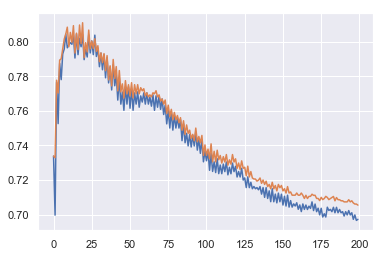

In [56]:
X_train, X_test, y_train, y_test = train_test_split(train.tweet, train.label, random_state = 1, test_size = 0.2)

f1 = []
f2 = []

for i in range(1, 201):
    f1.append(model_test_1(CountVectorizer(max_df = 0.5, stop_words='english'), KNeighborsClassifier(n_neighbors=i)))
    f2.append(model_test_1(CountVectorizer(max_df = 0.5, stop_words='english'), KNeighborsClassifier(n_neighbors=i, weights = 'distance')))
    if (i%5 == 0):
        print ('Iteration: ', i)
print (f1)
print (f2)

plt.plot(f1)
plt.plot(f2)

Iteration:  5
Iteration:  10
Iteration:  15
Iteration:  20
Iteration:  25
Iteration:  30
Iteration:  35
Iteration:  40
Iteration:  45
Iteration:  50
Iteration:  55
Iteration:  60
Iteration:  65
Iteration:  70
Iteration:  75
Iteration:  80
Iteration:  85
Iteration:  90
Iteration:  95
Iteration:  100
Iteration:  105
Iteration:  110
Iteration:  115
Iteration:  120
Iteration:  125
Iteration:  130
Iteration:  135
Iteration:  140
Iteration:  145
Iteration:  150
Iteration:  155
Iteration:  160
Iteration:  165
Iteration:  170
Iteration:  175
Iteration:  180
Iteration:  185
Iteration:  190
Iteration:  195
Iteration:  200
[0.7454824693088065, 0.685167830921413, 0.7752556834019735, 0.7390839229784169, 0.7849932521747144, 0.7684000029427728, 0.7934942742185083, 0.7673869674429732, 0.7990193108908651, 0.7926361590155683, 0.8161619170376468, 0.805889162248722, 0.8270074378835542, 0.8189632807366758, 0.8308916484868825, 0.8261967510586748, 0.83737486346182, 0.8329382546185039, 0.8424078948233146, 0.8

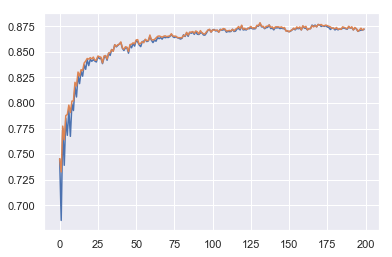

In [57]:
X_train, X_test, y_train, y_test = train_test_split(train.tweet, train.label, random_state = 1, test_size = 0.2)

f1 = []
f2 = []

for i in range(1, 201):
    f1.append(model_test_1(CountVectorizer(max_df = 0.5), KNeighborsClassifier(n_neighbors=i)))
    f2.append(model_test_1(CountVectorizer(max_df = 0.5), KNeighborsClassifier(n_neighbors=i, weights = 'distance')))
    if (i%5 == 0):
        print ('Iteration: ', i)
print (f1)
print (f2)

plt.plot(f1)
plt.plot(f2)

In [58]:
# F1-score = 0.811688062919491
model_test(CountVectorizer(max_df = 0.5, stop_words='english'), KNeighborsClassifier(n_neighbors=20))

Tokenization:
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

Model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')



In [60]:
# F1-score = 0.813430755805624
model_test(CountVectorizer(max_df = 0.5, stop_words='english'), KNeighborsClassifier(n_neighbors=20, weights = 'distance'))

Tokenization:
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

Model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='distance')



In [61]:
# F1-score = 0.843729133228626
model_test(CountVectorizer(max_df = 0.5), KNeighborsClassifier(n_neighbors=170))

Tokenization:
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

Model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=170, p=2,
           weights='uniform')



In [63]:
# F1-score = 0.843729133228626
model_test(CountVectorizer(max_df = 0.5), KNeighborsClassifier(n_neighbors=170, weights = 'distance'))

Tokenization:
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

Model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=170, p=2,
           weights='distance')

